# Waze Churn Prediction

### **author:** João Carvalho
**date:** "01-09-2025"

The capstone project for the Google Advanced Data Analytics course on Coursera presents a case study on data analysis and machine learning model creation for Waze. The main goal is to predict which users are likely to churn in order to implement business strategies to reduce that number.

<center>
  <img src="https://miro.medium.com/v2/resize:fit:3000/format:webp/1*rdFSukbSXoX7dfgM5cQubQ.jpeg" width="600">
</center>

### INTRODUCTION

- About the Company: Waze free navigation app makes it easy for drivers around the world to find their destinations. Waze's community of map editors, beta testers, translators, partners, and users helps make every trip better and safer.

In a fictitious scenario, Waze leadership asked its data team to develop a data model to predict user churn. Churn quantifies the number of users who uninstall the Waze app or stop using it. This project focuses on monthly user churn. An accurate model will help prevent churn, improve user retention, and grow Waze's business.

First, available data was discovered and evaluated, and then underwent exploratory data analysis (EDA) to identify which customers who will churn have different habits and motivations for using the company's services. The data was then processed using feature engineering to create several Machine Learning models (logistic regression, random forest and XGBoost) to identify the best predictors of churn, and their results were evaluated using scoring metrics.

Both the insights and the model scores were presented descriptively to other colleagues in the data department, in addition to the development of a slide presentation for non-technical stakeholders. The project presentation in PDF format is available at: [`Waze-Churn-Prediction.pdf`](https://github.com/carvalhojm/waze-data-scientist-project/blob/main/Waze-Churn-Prediction.pdf)

The main insights found were that users who will churn likely drive long distances for work, and therefore the app doesn't fully meet their expectations.
The model with the most satisfactory accuracy score was only able to identify about 30% of users who would churn, limiting the model's usability even if it were balanced to improve recall.

Therefore, more information and data would need to be collected to understand why these users leave the app, as well as to predict their churn. The details of these suggestions will be discussed at the end of the case study.

<center>
  <img src="https://i.imgur.com/gg2PJVP.jpeg" width="750">
</center>
<center>
  <font size="2"><a href="https://www.pexels.com/pt-br/foto/pessoa-maos-aplicativo-app-7362886/">(RDNE Stock project - Pexels)</a></font>
</center>

The tool used to carry out this work was Python, using the pandas, matplotlib, sklearn and xgboost libraries.

The dataset is fictional, as is all the information contained within, for practice purposes only, and was provided by Coursera itself.

The first step was to import the libraries and download the CSV file.

In [1]:
# import libraries
import numpy as np
import pandas as pd
# set to show all columns
pd.set_option("display.max_columns", None)
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


In [2]:
# Import the dataset
df_original = pd.read_csv("data/waze_dataset.csv")

# Summarize information
df_original.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


### 1. Data Discovering:

The first steps are to check the basic information of the dataset.

In [3]:
# Check columns names
df_original.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [4]:
# Check data infos and data types
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


The dataset has 14999 rows and 13 columns, containing int, obj and float.
The "label" column has 700 rows missing information.

In [5]:
df_original.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Some values indicate anomalies. The maximum "driven_km_drives" is over 21,000 km, which is more than half the circumference of the Earth and may inflate other numbers.

In [6]:
# Investigate null values
# Summarize statistics of null values
df_null = df_original[df_original["label"].isnull()]
df_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [7]:
# Summarize statistics of non-null values
df_not_null = df_original[~df_original["label"].isnull()]
df_not_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Analyzing the mean and standard deviations, there does not appear to be a large discrepancy between missing and non-missing records.

In [8]:
# Investiganting device counts in null values
# Count null values by device
print(df_null["device"].value_counts())
print()
round(df_null["device"].value_counts(normalize=True)*100,2)

device
iPhone     447
Android    253
Name: count, dtype: int64



device
iPhone     63.86
Android    36.14
Name: proportion, dtype: float64

In [9]:
# Calculate percentages of non-null values by device
round(df_original["device"].value_counts(normalize=True)*100,2)

device
iPhone     64.48
Android    35.52
Name: proportion, dtype: float64

The percentage of missing values by each device is consistent with their representation in the data overall.

In [10]:
print(df_original["label"].value_counts())
print()
round(df_original["label"].value_counts(normalize=True)*100,2)

label
retained    11763
churned      2536
Name: count, dtype: int64



label
retained    82.26
churned     17.74
Name: proportion, dtype: float64

This dataset contains 82% retained users and ~18% churned users.

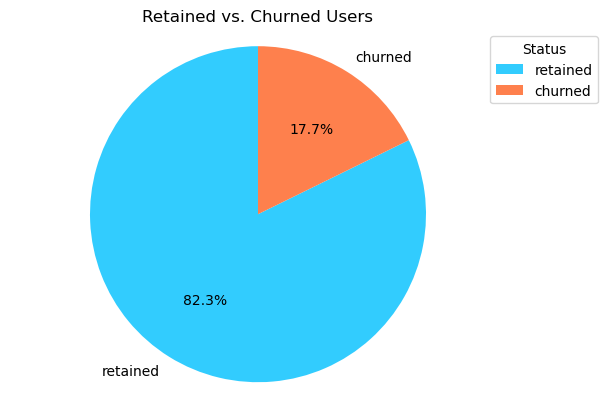

In [11]:
# plot a graph of users ratio
churn_ratio = df_original["label"].value_counts()

plt.pie(
    churn_ratio,
    labels=churn_ratio.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#32ccfe", '#fe804d']
)
plt.title("Retained vs. Churned Users")
plt.legend(title="Status", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.axis("equal")
plt.show()

In [12]:
# Calculate median values for churned and retained users
df_original.groupby("label").median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


The table leads to some insights:
- Users who churned averaged ~3 more drives in the last month than retained users, but retained users used 
the app on over twice as many days as churned users in the same time period.
- The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median 
retained user.
- It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration.
- This may suggest a different user profile than the default.

In [13]:
# copy the dataset
df = df_original.copy()

# calculate the median kilometers per drive in the last month for retained vs churned users.
df["km_per_drive"] = df["driven_km_drives"] / df["drives"]

df.groupby("label").median(numeric_only=True)[["km_per_drive"]]

,km_per_drive
label,
churned,74.109416
retained,75.014702


The median retained user drove about one more kilometer per drive than the median churned user.

In [14]:
# calculate the median kilometers per driving days in the last month for retained vs churned users.
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]

df.groupby("label").median(numeric_only=True)[["km_per_driving_day"]]

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


In [15]:
# calculate the median drives per driving days in the last month for retained vs churned users.
df["drives_per_driving_day"] = df["drives"] / df["driving_days"]

df.groupby("label").median(numeric_only=True)[["drives_per_driving_day"]]

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


The average churner drove 438 miles per day last month, representing nearly ~240% of the daily distance 
traveled by retained users. The average churner drove a disproportionate number of trips per day compared 
to retained users.

It's clear from these numbers that, regardless of whether the user actually churned, the users represented 
in this data are serious drivers! It's probably safe to assume that this data isn't representative of 
typical drivers in general. Perhaps the data—and the churner sample in particular—contains a high proportion 
of long-haul truck drivers.

It would be helpful if more data regarding these users' personal information were collected and analyzed 
to gain a clearer picture of this user group.

It's also possible that this is why they're leaving the Waze app (which was designed for everyday drivers) 
once their needs are no longer met.

In [16]:
# calculate the number os device users per churned vs retained users.
print(df.groupby(["label","device"]).size())
print()
round(df.groupby("label")["device"].value_counts(normalize=True)*100,2)

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64



label     device 
churned   iPhone     64.87
          Android    35.13
retained  iPhone     64.44
          Android    35.56
Name: proportion, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and 
those ratios are both consistent with the ratio found in the overall dataset.

GENERAL INSIGHTS
1. Only the "label" column, which precisely classifies which users have downloaded the app and which have 
uninstalled it, is missing. Through analysis, the missing values showed no pattern different from the rest of 
the data.
2. Discarding outliers that alter overall values ​​may be necessary for more accurate analysis and model creation.
3. It would be interesting to have more data containing customer personal information to identify more patterns 
between active and churned users, such as to confirm the hypothesis that users who churn most often work 
long-distance driving.
4. The percentage of Android users is ~36% and iPhone users ~64%.
5.
- Churned users had an average of 3 more trips than retained users, but retained users used the app practically 
twice as many days as churned users.
- The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median 
retained user. - Churned users had more drives in fewer days, and their trips were longer and longer in duration.
- The average retained user drove about one more kilometer per drive than the average churned user.
- The average retained user drove about one more kilometer per drive than the average churned user.
6. Comparing the percentage of both groups, there was no significant difference in the abandonment rate between 
iPhone and Android users.

### 2. Data Analysis:

Some visualizations will be made to better understand the data.

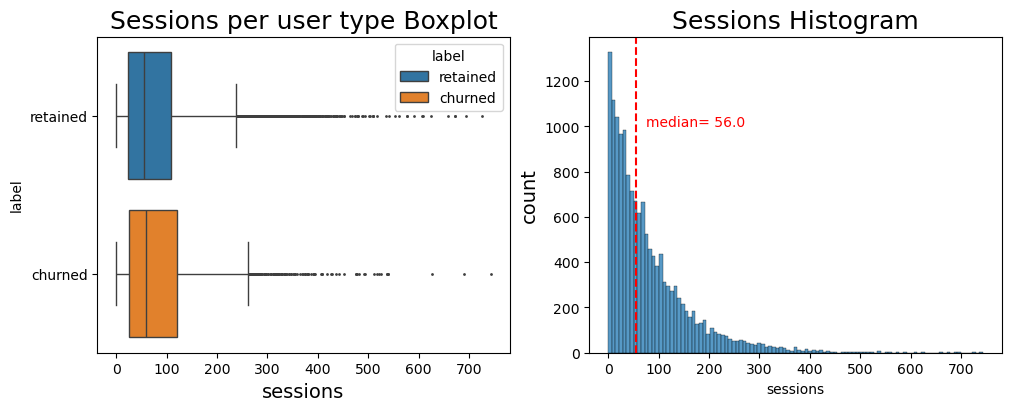

In [17]:
# Sessions column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

sns.boxplot(x="sessions", y="label", hue= "label", data=df, fliersize=1, ax=ax1) 
ax1.set_xlabel("sessions", fontsize=14)
ax1.set_title("Sessions per user type Boxplot", fontsize=18)

median = df["sessions"].median()
ax2 = sns.histplot(x=df["sessions"]) 
ax2.axvline(median, color="r", linestyle="--")
ax2.text(75,1000, "median= 56.0", color= "r")
ax2.set_xlabel('sessions')
ax2.set_ylabel('count', fontsize=14)
ax2.set_title('Sessions Histogram', fontsize=18)

plt.show()

Half of users open the app at least 56 times a month. However, some users open the app more than 700 times.

In [18]:
# fuction to help ploting
def grapher(column_name, spacing, median_txt=True, **kwargs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

    sns.boxplot(x=column_name, y="label", hue= "label", data=df, fliersize=1, ax=ax1)
    ax1.set_xlabel(column_name, fontsize= 14)
    ax1.set_title(column_name + " user type boxplot", fontsize=18)

    median= round(df[column_name].median(), 1)
    sns.histplot(x=df[column_name], ax=ax2, **kwargs)
    ax2.axvline(median, color="r", linestyle= "--")
    if median_txt==True:
        ax2.text(median + spacing, ax2.get_ylim()[1] * 0.8, f"median={median}", color="r", 
                 ha="left", va="top", fontsize=13)
    else:
        print("Median:", median)
    ax2.set_xlabel(column_name, fontsize= 14)
    ax2.set_ylabel("count", fontsize= 14)
    ax2.set_title(column_name + " histogram", fontsize=18)   

    plt.show()

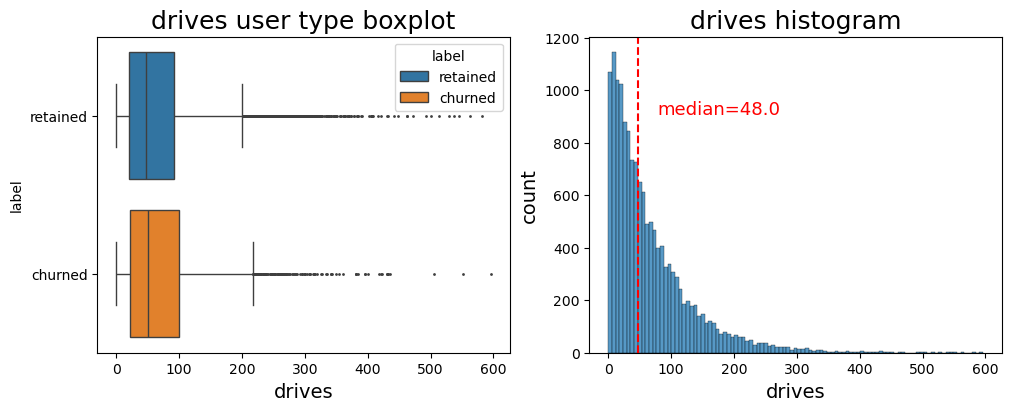

In [19]:
# drives column
grapher("drives", 30)

The "drives" data follows a similar distribution to the "sessions" variable. Half users had at least 48 drives, but some drives has more than 400 drives.

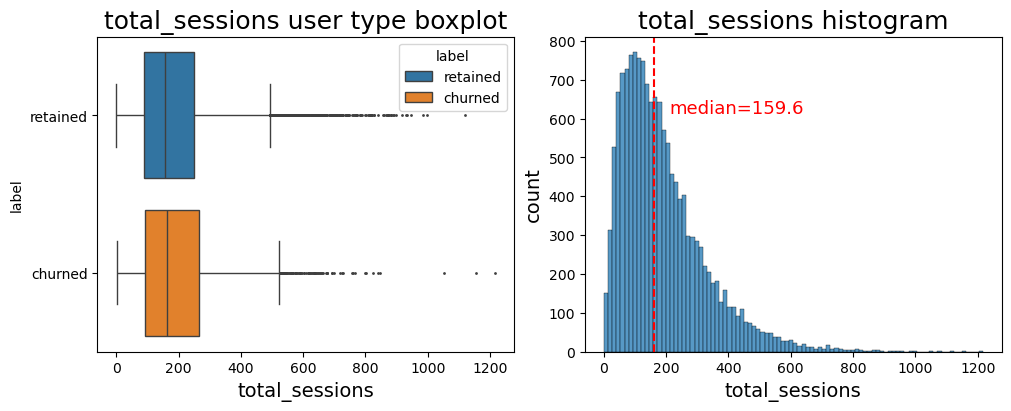

In [20]:
# total_sessions column
grapher("total_sessions", 50)

Based on previous session data, the median was 48, while the current total sessions are ~160, indicating a high proportion of sessions in the last month.

Median: 1741.0


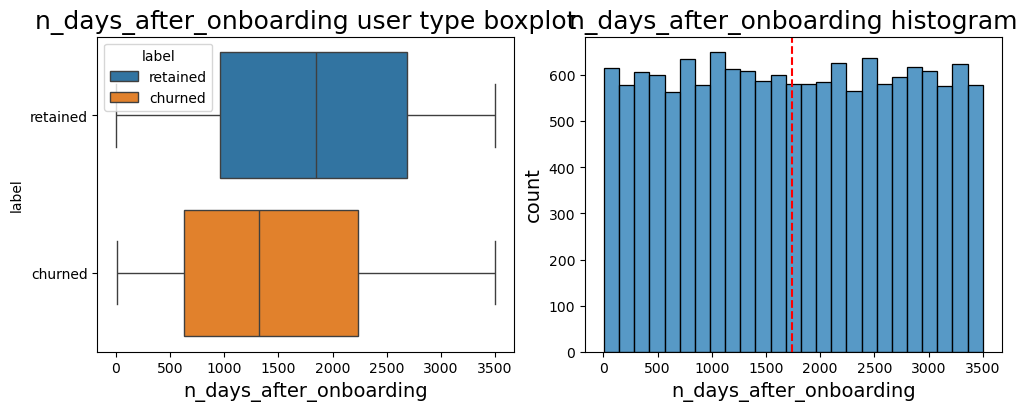

In [21]:
# n_days_after_onboarding column
grapher("n_days_after_onboarding", 50, median_txt=False)

The total user tenure has a uniform distribution with values ranging from near-zero to 3,500 days, approximately 9.5 years.

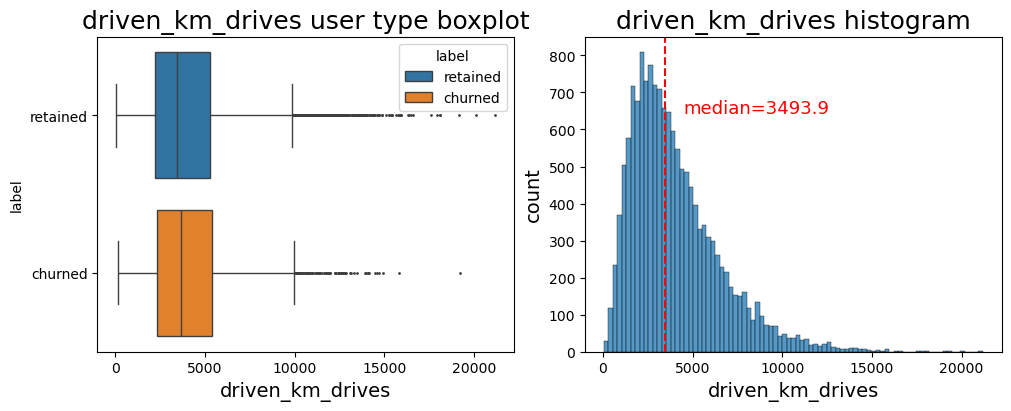

In [22]:
# driven_km_drives
grapher("driven_km_drives", 1000)

Half the users driving under 3,495 kilometers. As discovered in previous analysis and the box plot, there are many outliers that will be excluded.

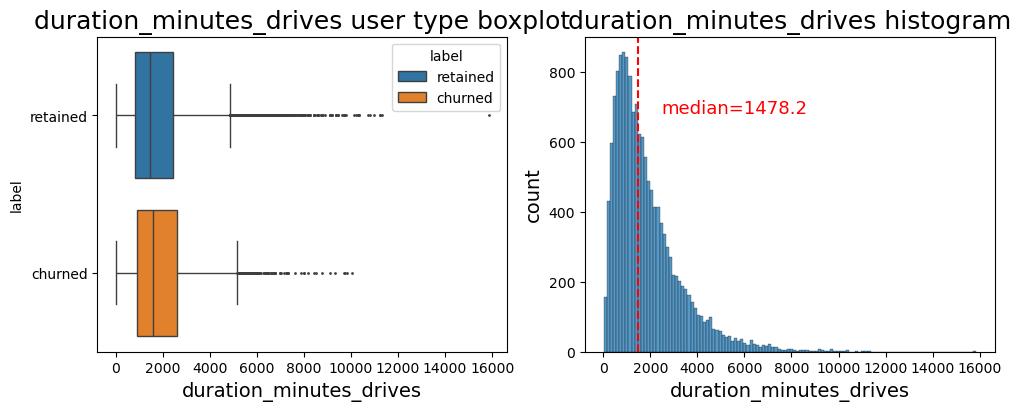

In [23]:
# duration_minutes_drives column
grapher("duration_minutes_drives", 1000)

Half of the users drove less than ~1,478 minutes (~25 hours), but some users clocked over 250 hours over the month, which represents more than 8 hours a day.

Median: 16.0


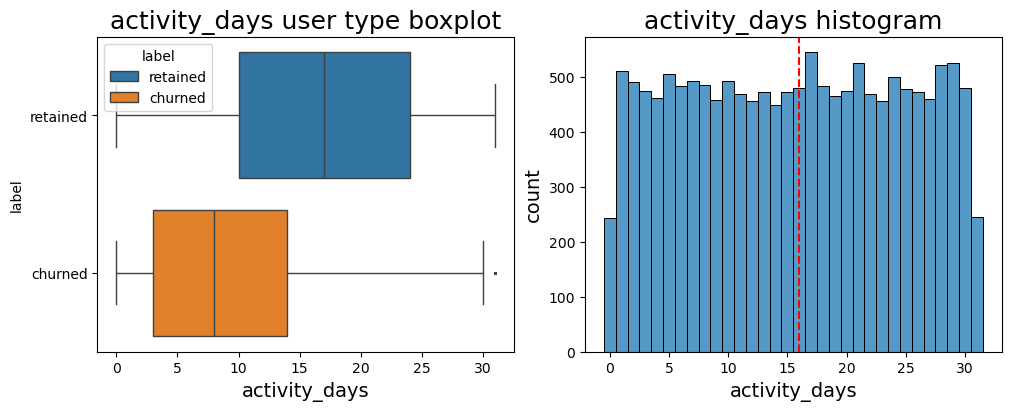

In [24]:
# activity_days column
grapher("activity_days", 50, median_txt=False, discrete=True)

These graphs offer some insights:
- Within the last month, users opened the app a median of 16 times. 
- The box plot reveals a centered distribution. '
- The histogram shows a nearly uniform distribution of ~500 people opening the app 
on each count of days. 
- However, there are ~250 people who didn't open the app at all and ~250 people who 
opened the app every day of the month.
- This distribution does not reflect the distribution of "sessions," showing that 
they are not directly related.

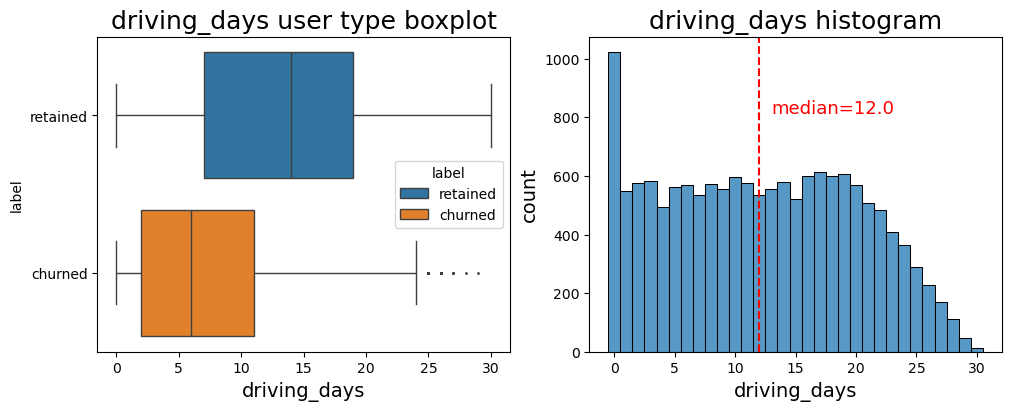

In [25]:
# driving_days column
grapher("driving_days", 1, discrete=True)

There were almost twice as many users (~1,000 vs ~500) who didn't drive at all during the month. Churn users drive even fewer days.

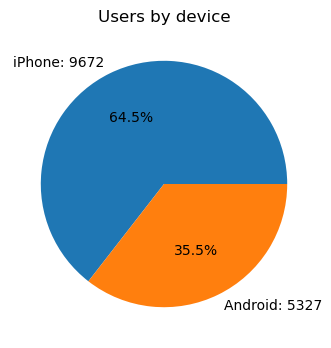

In [26]:
# device column
fig = plt.figure(figsize=(4,4))
data= df["device"].value_counts()
plt.pie(data,
        labels=[f"{data.index[0]}: {data.values[0]}",
                f"{data.index[1]}: {data.values[1]}"],
                autopct= "%.1f%%")
plt.title("Users by device")
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

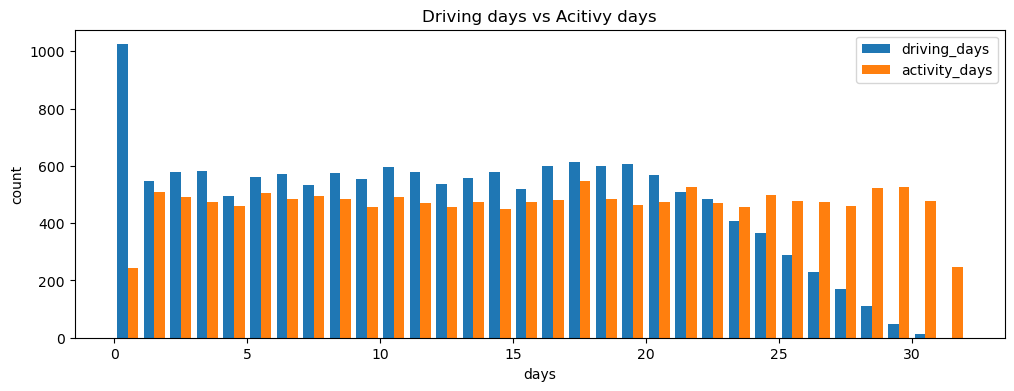

In [27]:
# driving days vs activity dasy
plt.figure(figsize=(12,4))
label=["driving_days","activity_days"]
plt.hist([df["driving_days"], df["activity_days"]],
         bins=range(0,33), label=label)
plt.xlabel("days")
plt.ylabel("count")
plt.legend()
plt.title("Driving days vs Acitivy days")
plt.show()

There are fewer people who didn't use the app than people who didn't drive during the month.
People probably open the app more than they use it to drive—perhaps to check travel times or route information, to update settings, or even by mistake.

In [28]:
print(df["driving_days"].max())
print(df["activity_days"].max())

30
31


The number of days in the month is not the same between variables. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikel

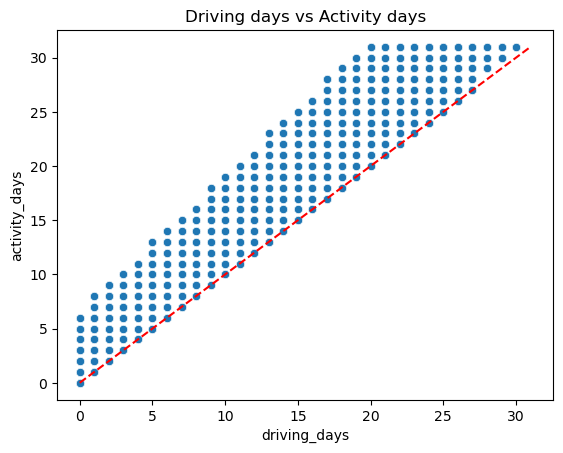

In [29]:
sns.scatterplot(data= df, x= "driving_days", y= "activity_days")
plt.title("Driving days vs Activity days")
plt.plot([0,31], [0,31], color="r", linestyle= "--")
plt.show()

Checking whether the number of drives is equal to or greater than the active days.


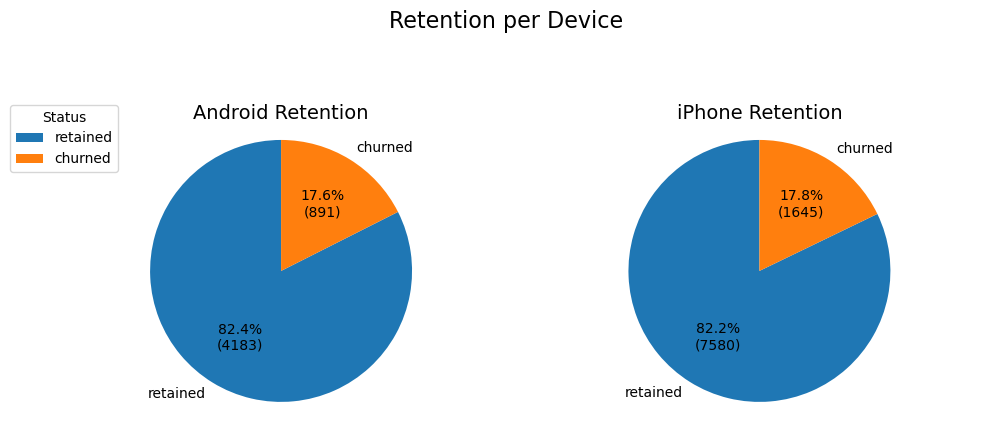

In [30]:
# reteintion by device
df_android = df[df['device'] == 'Android']
retention_android = df_android['label'].value_counts()

df_iphone = df[df['device'] == 'iPhone']
retention_iphone = df_iphone['label'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].pie(
    retention_android,
    labels=retention_android.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(retention_android)/100)})', 
    startangle=90
)
axes[0].set_title("Android Retention", fontsize=14)
axes[0].axis('equal')
axes[0].legend(title='Status', loc='upper left', bbox_to_anchor=(-0.1, 1.1)) 

axes[1].pie(
    retention_iphone,
    labels=retention_iphone.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(retention_iphone)/100)})', 
    startangle=90
)
axes[1].set_title('iPhone Retention', fontsize=14)
axes[1].axis('equal') 

plt.suptitle("Retention per Device", fontsize=16, y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The proportion of churned users to retained users is consistent between device types.

In [31]:
# retention by kilometers driven per driving day
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]
df["km_per_driving_day"].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [32]:
# cleaning data
df.loc[df["km_per_driving_day"]== np.inf, "km_per_driving_day"] = 0
df["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

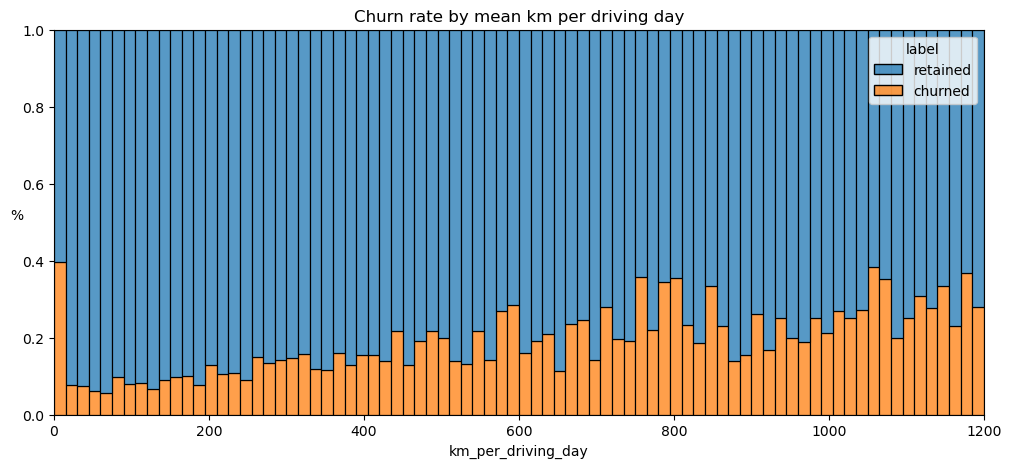

In [33]:
# "km_per_driving_day" plot
plt.figure(figsize=(12,5))
sns.histplot(data=df, x="km_per_driving_day",
             bins= range(0,1201,15), hue="label",
             multiple="fill")
plt.ylabel("%", rotation= 0)
plt.title("Churn rate by mean km per driving day")
plt.show()

Confirming what was found before, the churn rate tends to increase as the mean daily distance driven increases.
(Rows with distances greater than 1,200 km were disregarded.)

Text(0.5, 1.0, 'Churn rate by driving days')

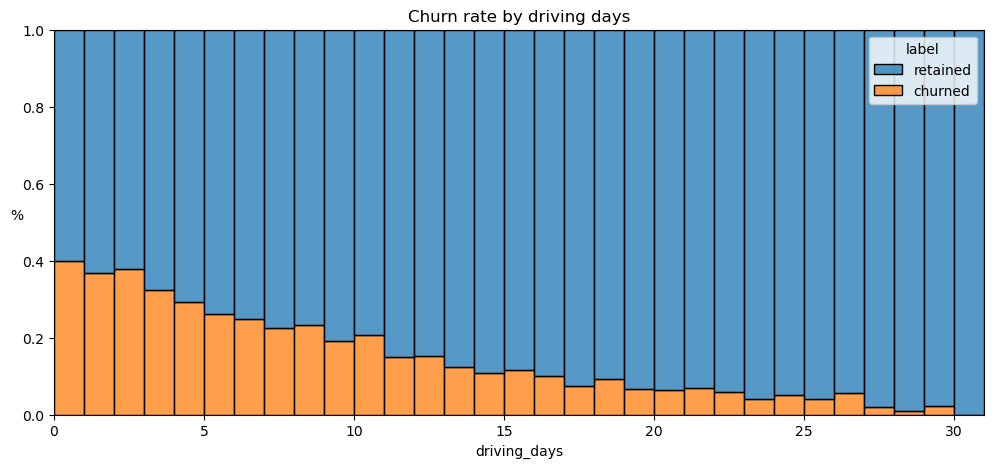

In [34]:
# churn rate per mumber of driving days
plt.figure(figsize=(12,5))
sns.histplot(data=df, x= "driving_days", bins= range(0,32,1),
             hue="label", multiple="fill")
plt.ylabel("%", rotation= 0)
plt.title("Churn rate by driving days")

- The churn rate is highest for people who didn't use Waze much during the last month. 
- The more times they used the app, the less likely they were to churn.
- While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.
- When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be 
- indicative of a lesser need for a navigational app, like using public transportation.

In [35]:
# proportion of sessions that occurred in the last month

df["percent_sessions_in_last_month"] = df["sessions"] / df["total_sessions"]
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.953670
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.406856
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.841186
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,0.724968
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.499266


Median: 0.4


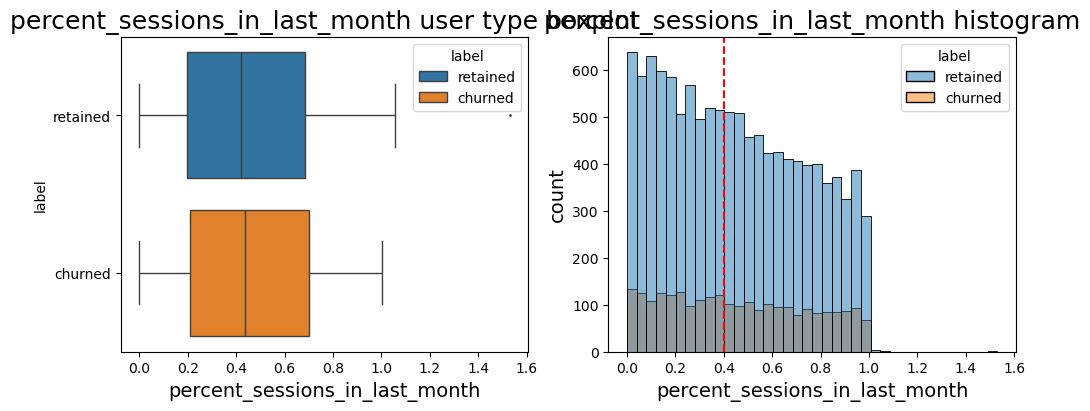

In [36]:
df["percent_sessions_in_last_month"].mean()

grapher("percent_sessions_in_last_month", 50, hue=df["label"], multiple="layer", median_txt=False)

In [37]:
# check the median value of the n_days_after_onboardin
df["n_days_after_onboarding"].mean()

np.float64(1749.8377891859457)

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

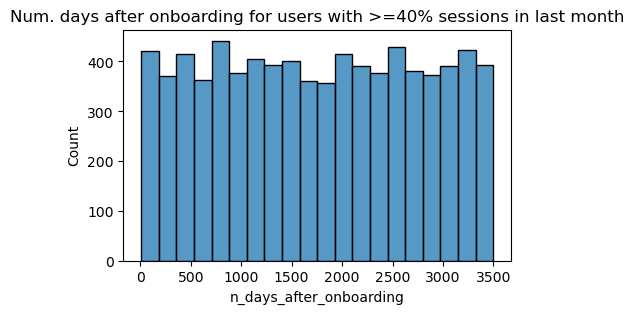

In [38]:
data = df.loc[df["percent_sessions_in_last_month"]>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data["n_days_after_onboarding"])
plt.title("Num. days after onboarding for users with >=40% sessions in last month")
plt.show()

Further investigation is needed to understand why so many long-time users have suddenly used the app so much in the last month.

In [39]:
# cleaning outliers

# crate a fuction to set a threshold based on a 95th percentile of the distribution.
def outlier_imputer(column_name, percentile):
    threshold = df[column_name].quantile(percentile)
    df.loc[df[column_name] > threshold, column_name] = threshold
    print("{:>25} | percentile: {} | threshold: {}".format(column_name, percentile, threshold))

In [40]:
for i in ["sessions", "drives", "total_sessions", "driven_km_drives", "duration_minutes_drives"]:
    outlier_imputer(i, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [41]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000,1.499200e+04,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,inf,578.963113,inf,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,NaN,1030.094384,NaN,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.008775e+00,0.000000,0.000000e+00,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,3.323065e+01,136.238895,1.800000e+00,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,7.488006e+01,272.889272,4.666667e+00,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,1.854667e+02,558.686918,1.216667e+01,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,inf,15420.234110,inf,1.530637


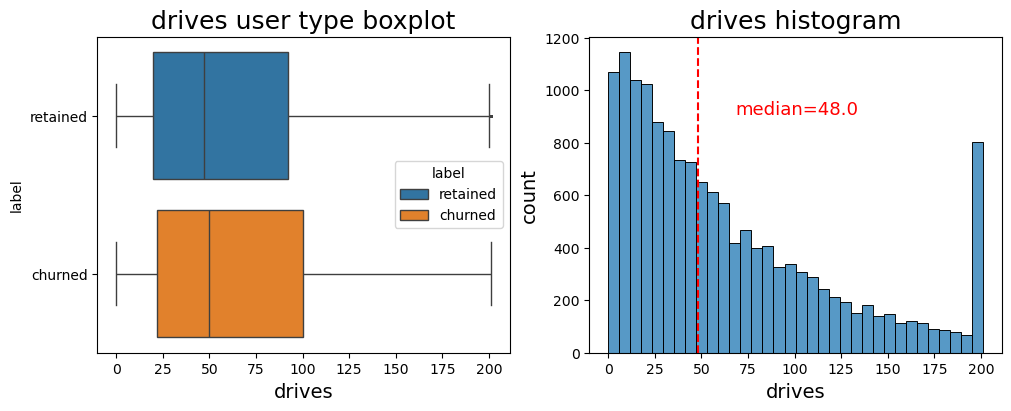

In [42]:
# checking changes
grapher("drives", 20)

In [43]:
df["monthly_drives_per_session_ratio"] = (df["drives"]/df["sessions"])
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.499266,0.809524


Median: 0.8


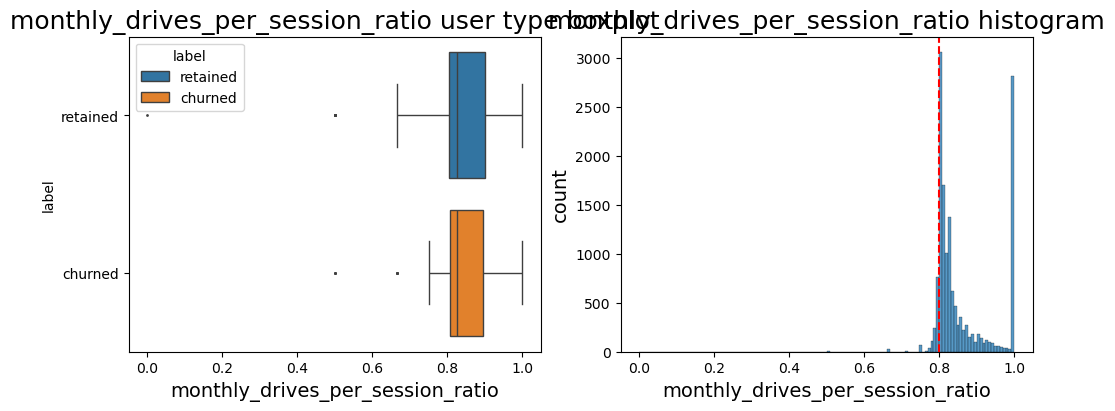

In [44]:
grapher("monthly_drives_per_session_ratio", 1, median_txt=False)

GENERAL INSIGHTS: 

- Almost all variables were either very skewed to the right or evenly distributed.
- Several variables had highly unlikely or perhaps even impossible outliers, such 
as `km_driven_driven`. Some of the monthly variables may also be problematic, such 
as `activity_days` and `driving_days`, because one has a maximum value of 31, while 
the other has a maximum value of 30.
- Further investigation would be necessary to determine why so many long-term users 
started using the app so frequently only in the last month. Were there any changes 
in the last month that might have motivated this type of behavior?
- Less than 18% of users churned, and ~82% were retained.
- Distance driven per driving day had a positive correlation with user churn. The 
farther a user drove on each driving day, the more likely they were to churn. On 
the other hand, number of driving days had a negative correlation with churn. Users 
who drove more days of the last month were less likely to churn.
- Users of all tenures from brand new to ~10 years were relatively evenly represented 
in the data.

### 3. Hypothesis Test

Do drivers who open the application using an iPhone have the same number of drives on average as drivers who use Android devices?

In [45]:
# copy the dataset to have a backup to test the hypothesis
df_hypothesis = df_original.copy()

# create a map dictionary
map_dictionary = {"iPhone":2, "Android":1}

# create a new device type column
df_hypothesis["device_type"] = df_hypothesis["device"].map(map_dictionary)
df_hypothesis.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_type
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,1
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,2
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,1
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,2
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,1


In [46]:
# check mean
df_hypothesis.groupby(["device_type"])["drives"].mean()

device_type
1    66.231838
2    67.859078
Name: drives, dtype: float64

The mean number os drives for iPhone users is about 66, and the Android users is about 67, a small difference. Therefore, a hypothesis test will be performed to identify whether this small difference is statistically significant and there is some event behind this number.

#### 3.1 Hypothesis testing
The goal is to conduct a two-sample t-test.

Steps for constructing a hypothesis test:

1. State the null hypothesis and the alternative hypothesis.

𝐻0: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids, the difference in mean values occurred by chance.

𝐻𝐴: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids, a statistically significant difference that the events occurred for some reason.

2. Choose a signficance level.

The chosen significance level is 5%


3. find the p-value

In [47]:
# isolate "drives" columns for user device type
iphone = df_hypothesis[df_hypothesis["device_type"] == 2]["drives"]
android = df_hypothesis[df_hypothesis["device_type"] == 1]["drives"]

# performe the t-test to find p-value
stats.ttest_ind(a=iphone,b=android, alternative="two-sided", equal_var=False)

TtestResult(statistic=np.float64(1.463523206885235), pvalue=np.float64(0.143351972680206), df=np.float64(11345.066049381952))

In [48]:
statistic, pvalue = stats.ttest_ind(a=iphone,b=android, alternative="two-sided", equal_var=False)
pvalue_percent = round(pvalue * 100, 2)
print("p-value:",pvalue_percent, "%")

p-value: 14.34 %


The p-value is ~14.3%

4. Reject or fail to reject the null hypothesis
Since the p-value was 14%, or greater than the chosen significance level, this indicates 
that the hypothesis was rejected. There was no statistically significant difference between Android and iPhone users.

GENERAL INSIGHTS:
- The key business insight is that drivers who use iPhone devices on average have a similar 
number of drives as those who use Androids.
- One potential next step is to explore what other factors influence the variation in the 
number of drives, and run additonal hypothesis tests to learn more about user behavior. 
Further, temporary changes in marketing or user interface for the Waze app may provide more 
data to investigate churn.

### 4. Regression Model

The goal is to build a binomial logistic regression model and evaluate its performance, as it helps estimate the probability of an outcome considering more than one variable.

The first step will be to prepare the dataset and create a new column that defines the number of professional drivers based on some parameters: has more than 60 drives in the month and drove for more than 15 days.


In [49]:
# prepare dataset
df_regression = df_original.copy()

# drop "ID" column
df_regression = df_regression.drop("ID", axis=1)

# creating features
df_regression["km_per_driving_day"] = df_regression["driven_km_drives"] / df_regression["driving_days"]
# fixing df["km_per_driving_day"] column
df_regression.loc[df_regression["km_per_driving_day"]== np.inf, "km_per_driving_day"] = 0

# create "professional_driver" new columns
df_regression["professional_driver"] = np.where((df_regression["drives"] >= 60) & (df_regression["driving_days"] >= 15), 1, 0)
df_regression["professional_driver"].head()

0    1
1    0
2    0
3    0
4    1
Name: professional_driver, dtype: int64

In [50]:
print(df_regression["professional_driver"].value_counts())
df_regression.groupby(["professional_driver"])["label"].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.5%, while the churn rate for non-professionals is 19.8%. This seems like it could add predictive signal to the model.

In [51]:
df_regression.isna().sum()

label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
km_per_driving_day           0
professional_driver          0
dtype: int64

The dataset has some columns with missing values: `label`. Since the logistic regression model does not accept missing values, these data will be cleaned.

In [52]:
# cleaning data
df_regression = df_regression.dropna()
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14299 non-null  int64  
 2   drives                   14299 non-null  int64  
 3   total_sessions           14299 non-null  float64
 4   n_days_after_onboarding  14299 non-null  int64  
 5   total_navigations_fav1   14299 non-null  int64  
 6   total_navigations_fav2   14299 non-null  int64  
 7   driven_km_drives         14299 non-null  float64
 8   duration_minutes_drives  14299 non-null  float64
 9   activity_days            14299 non-null  int64  
 10  driving_days             14299 non-null  int64  
 11  device                   14299 non-null  object 
 12  km_per_driving_day       14299 non-null  float64
 13  professional_driver      14299 non-null  int64  
dtypes: float64(4), int64(8), ob

In [53]:
# imput outliers
for column in ["sessions", "drives", "total_sessions", "total_navigations_fav1",
               "total_navigations_fav2", "driven_km_drives", "duration_minutes_drives"]:
    threshold = df_regression[column].quantile(0.95)
    df_regression.loc[df_regression[column] > threshold, column] = threshold
df_regression.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


In [54]:
# encode categorical variables
df_regression["label2"] = np.where(df_regression["label"] == "churned", 1, 0)
df_regression[["label", "label2"]].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


#### 4.1 Determining whether assumptions have been met

Based on the data dictionary, we can assume that the observations are independent for this project.

No extreme outliers has already been addressed before.

##### 4.1.1 No multicollinearity assumption:

In [55]:
corr_heatmap = df_regression.select_dtypes(include=[np.number]).corr(method="pearson")
corr_heatmap

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


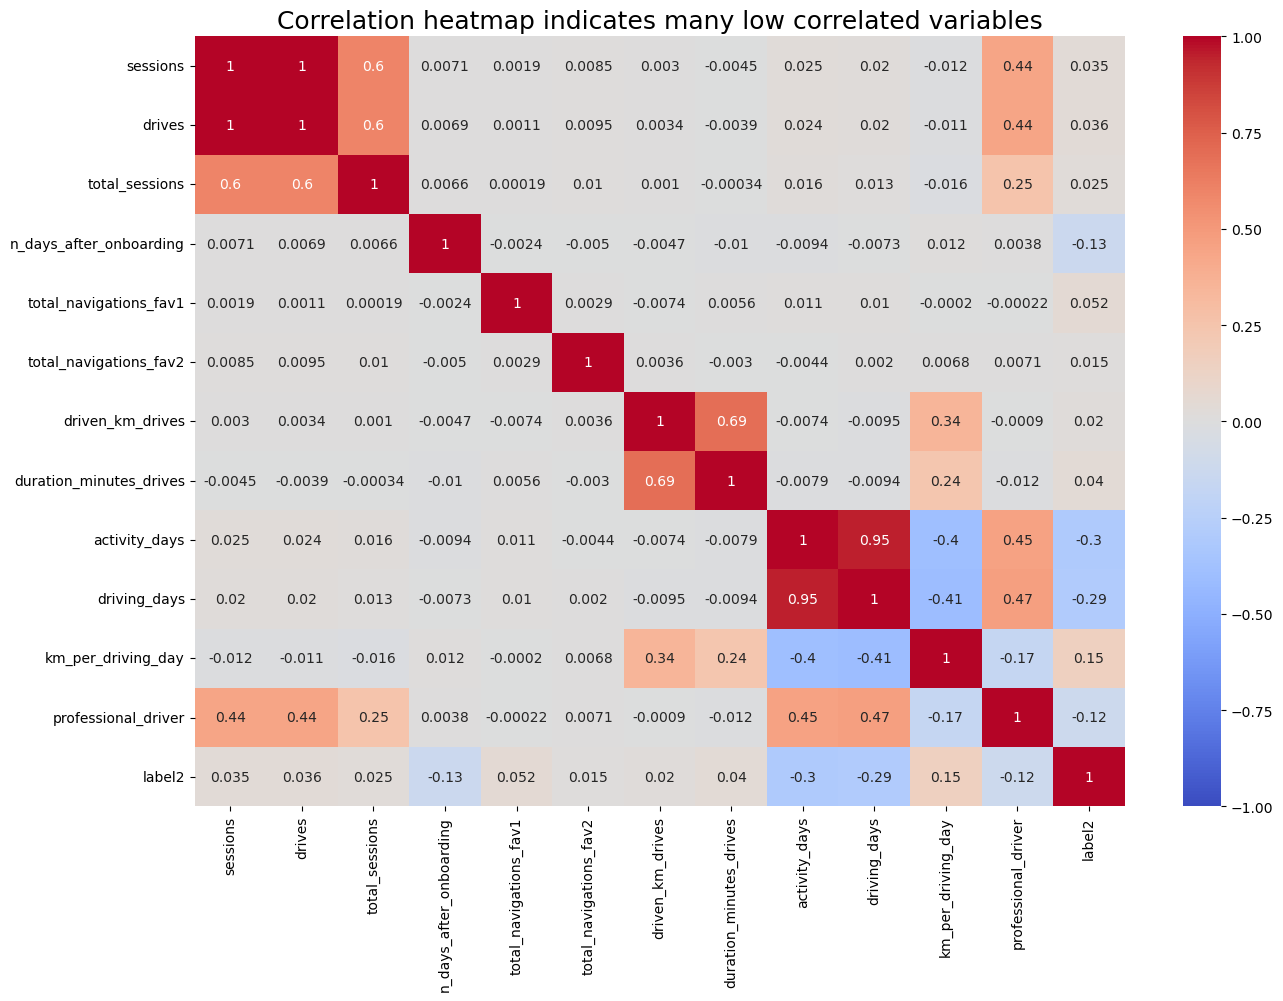

In [56]:
# plot a correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_heatmap, vmin= -1, vmax= 1, annot= True, cmap="coolwarm")
plt.title("Correlation heatmap indicates many low correlated variables", fontsize= 18)
plt.show()

Setting the limit to 0.7, two variables presented multicollinearity:
- sessions and drives: 1.0
- driving_days and activity_days: 0.95

In [57]:
# encode the target
df_regression["device2"] = np.where(df_regression["device"] == "Android", 0, 1)
df_regression[["device","device2"]].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


### Building the logistic regression model

Droping columns that are not usefull:
- label (this is the target)

- label2 (this is the target)

- device (this is the non-binary-encoded categorical variable)

- sessions (this had high multicollinearity)

- driving_days (this had high multicollinearity)

In [58]:
# Isolate predictor variables
X = df_regression.drop(columns= ["label", "label2", "device", "sessions", "driving_days"])
# Isolate target variable
y = df_regression["label2"]

Spliting the data

Set the function's stratify parameter to y to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
152,108,186.192746,3116,243,124,8898.716275,4668.180092,24,612.305861,1,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.545691,0,1
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.736581,0,0
669,108,455.439492,2320,11,4,6566.424830,4558.459870,18,410.401552,1,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.779333,0,1


In [60]:
# fit the model
model = LogisticRegression(penalty=None, max_iter=4000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=4000, penalty=None)

In [61]:
model.coef_

array([[ 1.94708298e-03,  3.68711419e-04, -3.99915762e-04,
         1.25810412e-03,  1.00686669e-03, -1.24235718e-05,
         1.10264898e-04, -1.05096629e-01,  1.96420122e-05,
        -1.07637166e-02,  1.65478182e-02]])

In [62]:
# create a series whose index is the column names and whose values are the coefficients in model.coef_
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001947
total_sessions             0.000369
n_days_after_onboarding   -0.000400
total_navigations_fav1     0.001258
total_navigations_fav2     0.001007
driven_km_drives          -0.000012
duration_minutes_drives    0.000110
activity_days             -0.105097
km_per_driving_day         0.000020
professional_driver       -0.010764
device2                    0.016548
dtype: float64

In [63]:
# intercept 
model.intercept_

array([-0.0650765])

Checking final assumption

#### 4.1.2 Checking the linear relationship between X and the estimated log odds

In [64]:
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93714646, 0.06285354],
       [0.62356852, 0.37643148],
       [0.76566194, 0.23433806],
       ...,
       [0.91811796, 0.08188204],
       [0.84887947, 0.15112053],
       [0.93319596, 0.06680404]])

In [65]:
logit_data = X_train.copy()

In [66]:
# create new "logit" column
logit_data["logit"] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]
logit_data.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2,logit
152,108,186.192746,3116,243,124,8898.716275,4668.180092,24,612.305861,1,1,-2.702032
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.545691,0,1,-0.504723
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.736581,0,0,-1.183976
669,108,455.439492,2320,11,4,6566.424830,4558.459870,18,410.401552,1,1,-2.053638
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.779333,0,1,-3.565641


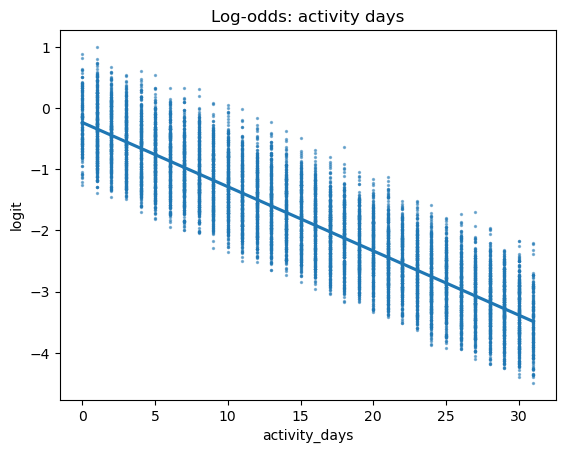

In [67]:
# plot
sns.regplot(x="activity_days", y="logit", data=logit_data, scatter_kws={"s":2, "alpha": 0.5})
plt.title("Log-odds: activity days")
plt.show()

As seen in the graph, as activity_days increases, the log-odds decrease approximately linearly, meaning that more days of activity are associated with a lower chance of the positive class.
 
The scattered pattern of the individual observations confirms consistency with the linearity hypothesis.

As days of activity increase, the probability of being satisfied decreases dramatically. In other words, very active users have a lower chance of being in the positive class (e.g., "satisfied").

Results and Evaluation

In [68]:
# generation predictions on X_test
y_preds = model.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
# score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8243356643356643

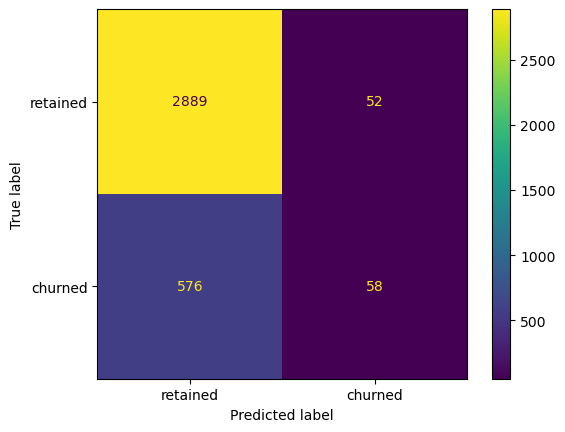

In [70]:
# Display results with a confusion matrix
cm = confusion_matrix(y_test, y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= ["retained", "churned"])
disp.plot();

The model is heavily biased toward the "retained" class, likely because it has higher numbers than churns.

- True Retained (TN): 2,889
- False Churns (FP): 52
- False Retained (FN): 576
- True Churns (TP): 58

The model correctly predicts almost all retained users, but misses most churned users.

Since the project's goal is to identify churned users, the results aren't very interesting. We'll run scorecards for a more in-depth analysis.

In [71]:
# analyze the results 
print("Accuracy:", round(accuracy_score(y_test, y_preds) * 100,1),"%") 
print("Precision:", round(precision_score(y_test, y_preds)* 100,1),"%")
print("Recall:", round(recall_score(y_test, y_preds) * 100,1),"%")
print("F1 Score:", round(f1_score(y_test, y_preds) * 100,1),"%")

Accuracy: 82.4 %
Precision: 52.7 %
Recall: 9.1 %
F1 Score: 15.6 %


In [72]:
# create a classification report
target_labels = ["retained", "churned"]
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.53      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



Analyzing results: 
- The model hits the vast majority of its predictions, with an accuracy of 82.4% considering retained and churned users.
- However, when isolating churned users, the accuracy is 53%, indicating that only half of those identified were actually churned. When we look at the total number of churned customers the model was able to correctly identify, the number drops to 9%, or 9 out of 100.
- That's why the F1 Score is so low, at 16%, because the balance between accuracy and accuracy for churn is very low.

Final considerations about the model
The model achieved 82% overall accuracy, meaning it gets most of its predictions right.
However, performance is uneven across groups:
- For customers who remain (retained), the model performs very well (98% accuracy).
- For customers who churn (cancel), the model has low detection power, identifying only 9% of actual cases.
 
This is because there are many more customers who remain than those who cancel.
The model prioritizes correct predictions in the majority class, but fails to predict churn well—precisely the customers most important to the retention strategy.
 
Despite its good overall accuracy, the model is not reliable for predicting churn.
It can create a false sense of security, as it practically only predicts that customers will remain.
 
To improve predictive results with the available data, it would be worthwhile to use some technique to balance the data.

Several techniques were tested to improve churned user identification. 
The best alternative found was to use a combination of SMOTE and undersampling. SMOTE creates synthetic data from the minority class, in this case churned users, and then undersamples the retained users. This balances data loss and duplication.


In [73]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train, y_train)

# train new model with balanced data
model2 = LogisticRegression(max_iter=5000)
model2.fit(X_res, y_res)

LogisticRegression(max_iter=5000)

In [74]:
# create a series whose index is the column names and whose values are the coefficients in model.coef_
pd.Series(model2.coef_[0], index=X.columns)

drives                     0.005071
total_sessions             0.000480
n_days_after_onboarding   -0.000689
total_navigations_fav1     0.001597
total_navigations_fav2    -0.000415
driven_km_drives          -0.000039
duration_minutes_drives    0.000095
activity_days             -0.123757
km_per_driving_day         0.000264
professional_driver       -1.445716
device2                   -0.709336
dtype: float64

In [75]:
# intercept 
model2.intercept_

array([3.12876596])

In [76]:
y_pred = model2.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

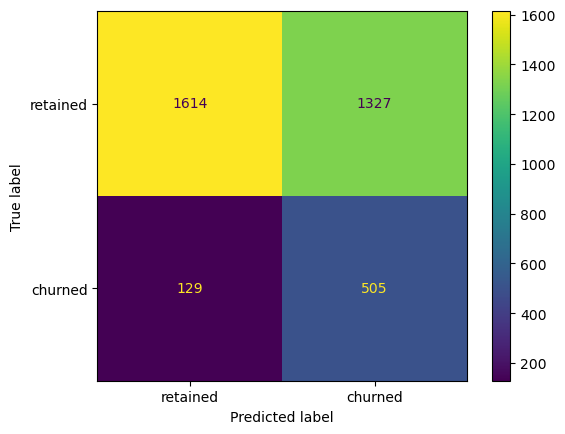

In [77]:
# creating a new confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["retained","churned"])
disp.plot()

New model results:

- True Retained (TN): 1,614
- False Churns (FP): 1327
- False Retained (FN): 129
- True Churns (TP): 505

The new model still remained biased, but now toward the "churned" side. Even with a large increase in false positives, the model reduced false negatives and managed to accurately predict the number of true churns.

In [78]:
# evaluate metrics
print(classification_report(y_test, y_pred, target_names=target_labels))
print("Accuracy:", round(accuracy_score(y_test, y_preds) * 100,1),"%") 

              precision    recall  f1-score   support

    retained       0.93      0.55      0.69      2941
     churned       0.28      0.80      0.41       634

    accuracy                           0.59      3575
   macro avg       0.60      0.67      0.55      3575
weighted avg       0.81      0.59      0.64      3575

Accuracy: 82.4 %


Previously, churned user recall was at 9%, a very low value. With the new model, recall increased to 80%, and the F1 Score increased from 0.16 to 0.41 (it didn't increase further due to the high rate of false positives).

Even with a drop in retained user scores, the project's focus is churn prediction. For retention strategies that don't require a lot investment, such as an in-app banner or an email, this model could be useful, it's more interesting to have a more targeted view of users who will churn, even if slightly distorted.

Of course, more research is needed, as well as an assessment of the project's financial viability.

Another option would be to adjust the threshold to analyze changes in user churn scores and predictions.

In [79]:
y_prob = model2.predict_proba(X_test)[:, 1]  
# change the default threshold from 0.5 to 0.3
y_pred_threshold = (y_prob >= 0.3).astype(int)  

print(classification_report(y_test, y_pred_threshold, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.94      0.37      0.54      2941
     churned       0.24      0.89      0.37       634

    accuracy                           0.47      3575
   macro avg       0.59      0.63      0.45      3575
weighted avg       0.82      0.47      0.51      3575



Overall scores decreased, but churned user recall increased from 80% to 89%.

Model results should be discussed based on the business's primary need. A balance would be ideal.

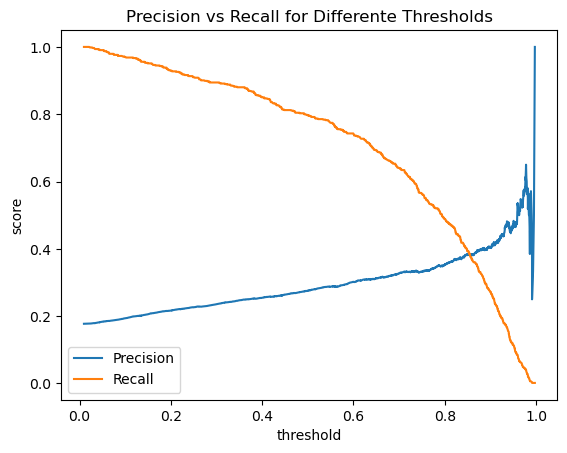

In [80]:
# evaluating precision and recall of different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.title("Precision vs Recall for Differente Thresholds")
plt.xlabel("threshold")
plt.ylabel("score")
plt.legend()
plt.show()

The graph shows how precision and recall change as the decision threshold is adjusted, being inversely proportional.

- If the main objective is to detect as many churners as possible, a low threshold of 0.3 is ideal, even if it misses those who wouldn't otherwise leave.
- If the main objective is to avoid false alarms, a high threshold of 0.6-0.7 would be more effective, but would miss more real churners.

Generating a bar chart of the coefficients of the model for a visual representation of the importance of the features. Only the first model will be performed, since its precision score was higher, making it worthwhile to evaluate only the truly accurate characteristics of the two churn users.

In [81]:
# create a list of (column_name, coefficient) tuples
features_importance = list(zip(X_train.columns, model.coef_[0]))
# sort the list by coefficient value
features_importance = sorted(features_importance, key=lambda x:x[1], reverse = True)
features_importance

[('device2', np.float64(0.016547818167260718)),
 ('drives', np.float64(0.0019470829767949034)),
 ('total_navigations_fav1', np.float64(0.001258104118571255)),
 ('total_navigations_fav2', np.float64(0.0010068666943408694)),
 ('total_sessions', np.float64(0.0003687114187099854)),
 ('duration_minutes_drives', np.float64(0.00011026489757540904)),
 ('km_per_driving_day', np.float64(1.9642012190868706e-05)),
 ('driven_km_drives', np.float64(-1.2423571771202536e-05)),
 ('n_days_after_onboarding', np.float64(-0.00039991576185306597)),
 ('professional_driver', np.float64(-0.010763716579638344)),
 ('activity_days', np.float64(-0.10509662873994616))]

Text(0.5, 0, 'user churn correlation')

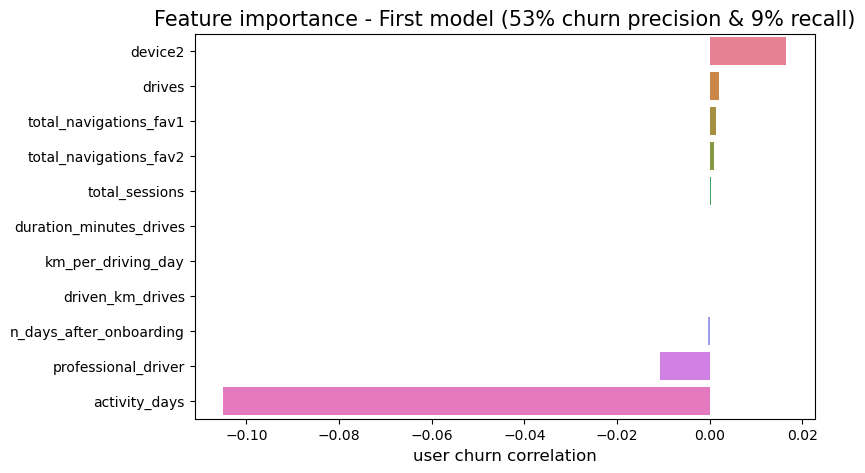

In [82]:
plt.figure(figsize=(8,5))
sns.barplot(x=[x[1] for x in features_importance],
            y=[x[0] for x in features_importance],
            hue= [x[0] for x in features_importance],
            orient="h", legend=False)
plt.title("Feature importance - First model (53% churn precision & 9% recall)", fontsize=15)
plt.xlabel("user churn correlation", fontsize=12)

The `device` would be the most decisive factor in increasing the likelihood of churn, while `activity_days` and `professional_drivers` would be the factors that increase the likelihood of churn.


##### GENERAL INSIGHTS:

According to the feature importance graph, `activity_days` was by far the most important feature in the model. It showed a negative correlation with user churn. This was not surprising, as this variable showed a strong correlation with `driving_days`, which, according to the EDA, had a negative correlation with churn.

`km_per_driving_day` was expected to have a higher predictive value in the model. In the model, when they looked at feature importance, this attribute ended up appearing as of little relevance (second least important). In a multiple logistic regression model, variables interact with each other, and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while also making it more difficult to explain.

As in the case of `km_per_driving_day`, something that appears predictive on its own may lose relevance when combined with other variables because the model is already explaining the same effect through another pathway.

The second model created, despite lowering the overall prediction scores, managed to increase churn recall to 89%. However, it was generating many false positives. However, in an emergency scenario, this model could be used despite its flaws, since it is better to please a percentage of users who would not otherwise leave the app with coupon campaigns or exclusive features than to let several churned users slip through undetected.

New features could be designed to generate a better predictive signal. In this model's case, one of the designed features (`professional_driver`) was the second most predictive predictor. It could also be useful to scale the predictor variables and/or rebuild the model with different combinations of predictor variables to reduce noise from non-predictive features.

Even though the best possible model solution was obtained with the logistic regression model, other solutions could be explored in the future. How to test more robust machine learning algorithms for imbalanced data, like decision tree models (next step of the case study). It would also be helpful to have more information about each user's driving level (such as driving times, geographic locations, etc.), with more granular data that would improve future regressions.


### 5. Building Machine Learning Models

Final consideration before building the ML model:

The goal of this project is to predict whether a customer will churn or continue using the app, allowing Waze to adopt proactive retention measures. However, there are ethical implications: a false negative would cause the company to miss the opportunity to intervene and potentially retain the user, while a false positive could generate a negative experience by annoying loyal users with unnecessary actions. Despite these risks, if the measures are applied in a balanced and effective manner, the benefits outweigh the potential problems, making model development feasible and recommended, provided it is accompanied by ongoing impact analysis.

#### 5.1 Feature Engineering

The first step in building a machine learning model is Feature Engineering, an important process that transforms raw data into more relevant and informative features, improving the performance of predictive models. 

The previously created columns (`km_per_driving_day`,`percent_sessions_in_last_month`, `professional_driver`) would fit into this process. These columns will be created again, and new ones will be developed to further refine the predictions.


In [83]:
df_ml = df_original.copy()

# create again previus columns
df_ml['km_per_driving_day'] = df_ml['driven_km_drives'] / df_ml['driving_days']
df_ml.loc[df_ml['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

df_ml["percent_sessions_in_last_month"] = df_ml['sessions'] / df_ml['total_sessions']

df_ml["professional_driver"] = np.where((df_ml["drives"] >= 60) & (df_ml["driving_days"] >= 15), 1, 0)

df_ml.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,1
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856,0
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,1


In [84]:
# create new columns
df_ml["total_sessions_per_day"] = df_ml["total_sessions"] / df_ml["n_days_after_onboarding"]
df_ml["total_sessions_per_day"].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

In [85]:
df_ml["km_per_hour"] = df_ml["driven_km_drives"] / (df_ml["duration_minutes_drives"] / 60)
df_ml["km_per_hour"].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

In [86]:
df_ml["km_per_drive"] = df_ml["driven_km_drives"] / df_ml["drives"]
df_ml.loc[df_ml["km_per_drive"]==np.inf, "km_per_drive"] = 0
df_ml["km_per_drive"].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

In [87]:
df_ml["percent_of_sessions_to_favorite"] = (
    df_ml["total_navigations_fav1"] + df_ml["total_navigations_fav2"]) / df_ml["total_sessions"]
df_ml["percent_of_sessions_to_favorite"].describe()

count    14999.000000
mean         1.665439
std          8.865666
min          0.000000
25%          0.203471
50%          0.649818
75%          1.638526
max        777.563629
Name: percent_of_sessions_to_favorite, dtype: float64

In [88]:
# check new columns
df_ml.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_sessions_to_favorite
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,1,0.130381,79.430298,11.632058,0.700931
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856,0,0.266854,260.389902,128.186173,0.253903
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0,0.051121,113.953460,32.201567,0.000000
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0,4.505948,93.351141,22.839778,4.867640
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,1,0.107713,194.342970,58.091206,1.016363
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,0.404229,0,0.106009,123.147688,8.749890,0.000000
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,0.012673,0,0.657570,433.471306,2624.586414,0.857534
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,0.221499,0,0.058711,191.944326,225.487213,0.000000
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,0.310573,0,0.432859,99.791944,57.645864,0.141665
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,0.343134,0,0.081682,154.838864,88.874416,0.294115


In [89]:
# dropmissing values
df_ml = df_ml.dropna(subset=["label"])

In [90]:
# variable encoding
df_ml["device2"] = np.where(df_ml["device"]=="Android", 0, 1)
df_ml[["device", "device2"]].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


In [91]:
# target encoding
df_ml["label2"] = np.where(df_ml["label"]=="retained", 0, 1)
df_ml[["label","label2"]].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [92]:
# feature selection
df_ml = df_ml.drop(["ID"], axis=1)
df_ml.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_sessions_to_favorite,device2,label2
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,1,0.130381,79.430298,11.632058,0.700931,0,0
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856,0,0.266854,260.389902,128.186173,0.253903,1,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0,0.051121,113.953460,32.201567,0.000000,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0,4.505948,93.351141,22.839778,4.867640,1,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,1,0.107713,194.342970,58.091206,1.016363,0,0


In [93]:
# evaluation metric
round(df_ml["label"].value_counts(normalize=True),3)

label
retained    0.823
churned     0.177
Name: proportion, dtype: float64

#### 5.2 Modeling workflow and model selection process

The data will be split into train/validation/test sets (60/20/20)

<center>
  <img src="https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg" width="750">
</center>

In [94]:
# define X and y variables
X = df_ml.copy()
X = X.drop(columns=["label","label2", "device"])

y = df_ml["label2"]

In [95]:
# split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                              test_size=0.25, random_state=42)

In [96]:
# verify the number of samples in the partitioned data
for i in [X_train, X_val, X_test]:
    print(len(i))

8579
2860
2860


The test and validation sets have the same size, as they should be

#### 5.3 Modeling

##### 5.3.1 Random Forest

In [97]:
rf = RandomForestClassifier(random_state=42)

# define hyperparameters
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

# define a list of scoring metrics
scoring = ["accuracy", "precision", "recall", "f1"]

# instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring= scoring, cv=4, refit="recall")

In [98]:
# fit the model
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [99]:
# examine the best average score across all the validation folds
rf_cv.best_score_

np.float64(0.12678201409034398)

In [100]:
# examine the best combination of hyperparameters
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [101]:
# making a fuction to output all scores
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [102]:
results = make_results("Random Forest cv", rf_cv, "recall")
results

,model,precision,recall,F1,accuracy
0,Random Forest cv,0.457163,0.126782,0.198445,0.81851


Besides accuracy, the scores aren't as good. However, compared to the logistic regression model, the recall was ~0.09, meaning this model has 33% better recall and roughly the same accuracy, and was trained with less data.

##### 5.3.2 XGboost

Making a xgboost model to compare results

In [103]:
xgb = XGBClassifier(objective="binary:logistic", random_state=42)

# define hyperparameters
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# define a list of scoring metrics
scoring = ["accuracy", "precision", "recall", "f1"]

# instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit="recall")

In [104]:
# fit the model
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [105]:
# get the best score grom this model
xgb_cv.best_score_

np.float64(0.17936351706036746)

In [106]:
# exame the best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 5,
 'n_estimators': 300}

In [107]:
# outputing scores
xgb_cv_results = make_results("XGBoost cv", xgb_cv, "recall")

results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest cv,0.457163,0.126782,0.198445,0.818510
0,XGBoost cv,0.424500,0.179364,0.251974,0.811167


This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model from the previous course, and it's almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score. 

#### 5.4 Model Selection

Predicting on validation data with the two model

In [108]:
# random forest:
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [109]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [110]:
rf_val_scores = get_test_scores("RandomForest val", rf_val_preds, y_val)

results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest cv,0.457163,0.126782,0.198445,0.818510
0,XGBoost cv,0.424500,0.179364,0.251974,0.811167
0,RandomForest val,0.445255,0.120316,0.189441,0.817483


Notice that the scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

In [111]:
# XGBoost
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

xgb_val_scores = get_test_scores("XGBoost val", xgb_val_preds, y_val)

results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest cv,0.457163,0.126782,0.198445,0.818510
0,XGBoost cv,0.424500,0.179364,0.251974,0.811167
0,RandomForest val,0.445255,0.120316,0.189441,0.817483
0,XGBoost val,0.395556,0.175542,0.243169,0.806294


Just like with the random forest model, the XGBoost model's validation scores were lower, but only very slightly. It is still the clear champion.

Using the champion model (XGBoost) to predict on test data.

This serves to give a final indication of how to expect the model to behave on new future data.

In [112]:
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

xgb_test_scores = get_test_scores("XGBoost test", xgb_test_preds, y_test)

results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest cv,0.457163,0.126782,0.198445,0.818510
0,XGBoost cv,0.424500,0.179364,0.251974,0.811167
0,RandomForest val,0.445255,0.120316,0.189441,0.817483
0,XGBoost val,0.395556,0.175542,0.243169,0.806294
0,XGBoost test,0.416327,0.201183,0.271277,0.808392


The scores performed better than with the validation data. 

The recall score, the most important metric, increased even further.

Let's build a confusion matrix of the champion model's predictions on the test data to check the results.

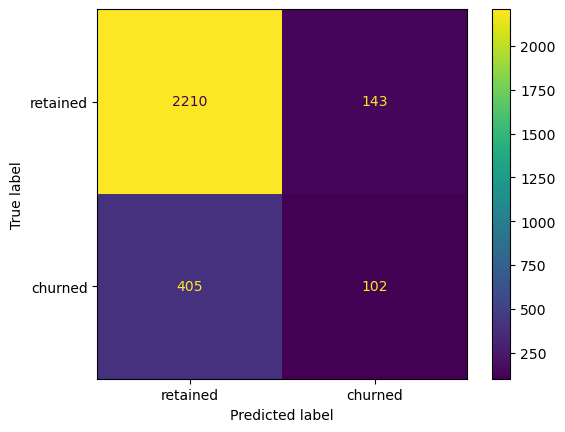

In [113]:
cm = confusion_matrix(y_test, xgb_test_preds, labels= xgb_cv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ["retained", "churned"])
disp.plot();

The model predicted three times as many false negatives than it did false positives, and it correctly identified only 20% of the users who actually churned.

Let's check the feature importance of the variables with the .plot_importance() function.

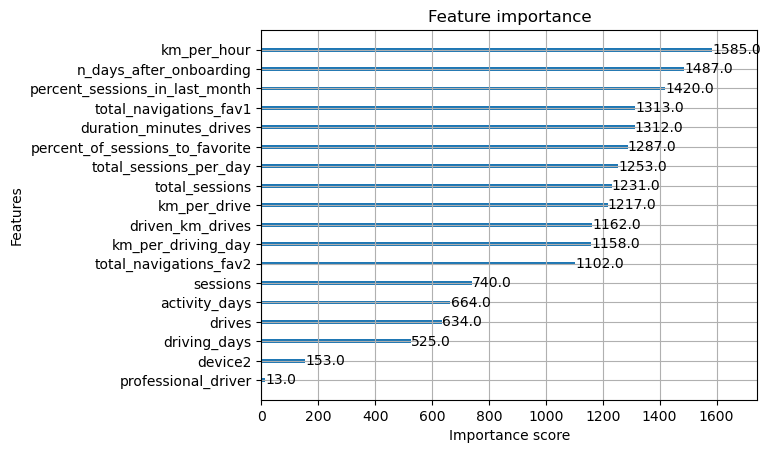

In [114]:
# feature of importance 
plot_importance(xgb_cv.best_estimator_);

The XGBoost model made more use of many of the features than did the logistic regression model, which weighted a single feature (activity_days) very heavily in its final prediction.

This highlights the importance of feature engineering in creating the new columns. Engineered features accounted for six of the top 10 features (and three of the top five).

For a better recall score, let's test adjusting threshold for different model predictions results.

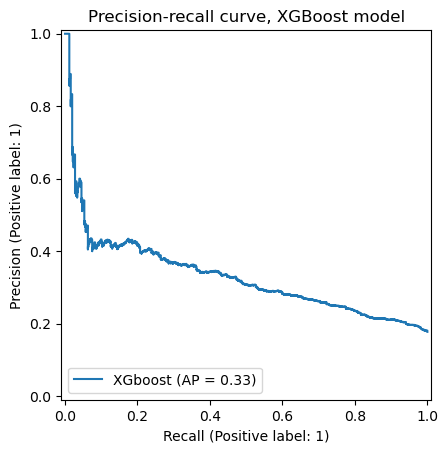

In [115]:
# plot precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    xgb_cv.best_estimator_, X_test, y_test, name="XGboost"
)
plt.title("Precision-recall curve, XGBoost model")
plt.show()

As recall increases, precision decreases. But what if you determined that false positives aren't much of a problem? For example, in the case of this Waze project, a false positive could just mean that a user who will not actually churn gets an email and a banner notification on their phone. It's very low risk.

In [116]:
# get predicted probabilities on the test data
predicted_probabilities = xgb_cv.best_estimator_.predict_proba(X_test)
predicted_probabilities

array([[0.97292364, 0.02707634],
       [0.43276215, 0.56723785],
       [0.9978458 , 0.00215418],
       ...,
       [0.80911976, 0.19088022],
       [0.9601506 , 0.03984943],
       [0.73966396, 0.26033607]], dtype=float32)

In [117]:
# create a list of just the second column values (probability of target)
probs = [i[1] for i in predicted_probabilities]

# create an array of new predictions that assigns a 1 to any value >= 0.4
new_preds = np.array([1 if x >= 0.4 else 0 for x in probs])
new_preds

array([0, 1, 0, ..., 0, 0, 0])

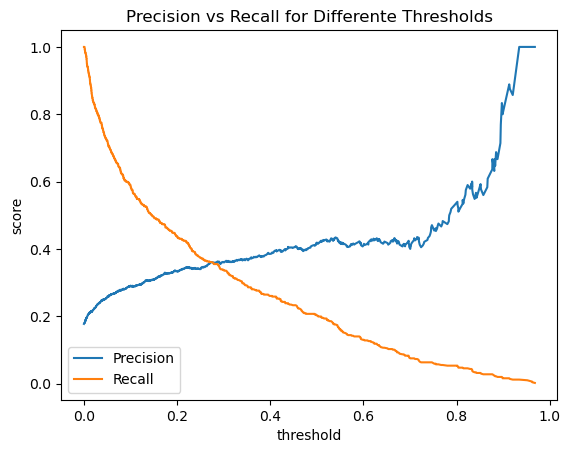

In [118]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.title("Precision vs Recall for Differente Thresholds")
plt.xlabel("threshold")
plt.ylabel("score")
plt.legend()
plt.show()

In [119]:
# check evaluation metrics for the new 0.4 threshold
get_test_scores("XGB, threshold = 0.4", new_preds, y_test)

,model,precision,recall,F1,accuracy
0,"XGB, threshold = 0.4",0.385965,0.260355,0.310954,0.795455


In [120]:
# compare results
results

,model,precision,recall,F1,accuracy
0,Random Forest cv,0.457163,0.126782,0.198445,0.818510
0,XGBoost cv,0.424500,0.179364,0.251974,0.811167
0,RandomForest val,0.445255,0.120316,0.189441,0.817483
0,XGBoost val,0.395556,0.175542,0.243169,0.806294
0,XGBoost test,0.416327,0.201183,0.271277,0.808392


Recall and F1 score increased significantly, while precision and accuracy decreased

In [121]:
# function that determines the threshold based on the desired recall
def threshold_finder(y_test_data, probabilities, desired_recall):
    '''
    Find the decision threshold that most closely yields a desired recall score.

    Inputs:
        y_test_data: Array of true y values
        probabilities: The results of the `predict_proba()` model method
        desired_recall: The recall that you want the model to have

    Outputs:
        threshold: The decision threshold that most closely yields the desired recall
        recall: The exact recall score associated with `threshold`
    '''
    probs = [x[1] for x in probabilities]  # Isolate second column of `probabilities`
    thresholds = np.arange(0, 1, 0.001)    # Set a grid of 1,000 thresholds to test

    scores = []
    for threshold in thresholds:
        # Create a new array of {0, 1} predictions based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Calculate recall score for that threshold
        recall = recall_score(y_test_data, preds)
        # Append the threshold and its corresponding recall score as a tuple to `scores`
        scores.append((threshold, recall))

    distances = []
    for idx, score in enumerate(scores):
        # Calculate how close each actual score is to the desired score
        distance = abs(score[1] - desired_recall)
        # Append the (index#, distance) tuple to `distances`
        distances.append((idx, distance))

    # Sort `distances` by the second value in each of its tuples (least to greatest)
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # Identify the tuple with the actual recall closest to desired recall
    best = sorted_distances[0]
    # Isolate the index of the threshold with the closest recall score
    best_idx = best[0]
    # Retrieve the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall

In [122]:
# get the predicted probabilities from the champion model
probabilities = xgb_cv.best_estimator_.predict_proba(X_test)

# desired recall = 0.5
threshold_finder(y_test, probabilities, 0.5)

(np.float64(0.145), 0.5009861932938856)

In [123]:
probs = [x[1] for x in probabilities]
new_preds = np.array([1 if x >= 0.145 else 0 for x in probs])

get_test_scores('XGB, threshold = 0.145', new_preds, y_test)

,model,precision,recall,F1,accuracy
0,"XGB, threshold = 0.145",0.307506,0.500986,0.381095,0.711538


<center>
  <img src="https://images.pexels.com/photos/134643/pexels-photo-134643.jpeg?_gl=1*1jfcslt*_ga*MTA2ODkyOTA1NS4xNzUxNDIxNDQ2*_ga_8JE65Q40S6*czE3NTY4Mzk1MzAkbzUkZzEkdDE3NTY4Mzk2MjIkajQxJGwwJGgw" width="750">
</center>
<center>
  <font size="2"><a href="https://www.pexels.com/pt-br/@joey-kyber-31917/">(Joey Kyber - Pexels)</a></font>
</center>

### 6. CONCLUSIONS

Whether this model is recommended for churn prediction would depend on the company's objective.

If it were used to guide relevant business decisions, then no, as it is not a strong enough predictor, as evidenced by its low recall score. However, if the model is only being used to guide additional exploratory efforts or lightweight retention marketing campaigns such as banners and emails, it may have value.

Dividing the data into three parts (train, validation, and test) has its advantages and disadvantages. This results in less data available to train the model than splitting it into just two parts, especially on a small dataset like this. However, performing model selection on a separate validation set allows the champion model to be tested in isolation on the previously unseen test set, more realistically simulating new data input. This provides another step in model verification, providing a better estimate of future performance.

As observed when comparing the scores of the models developed at this stage with the logistic regression model, tree-based models are often better predictors, as was the case in this case study.

Despite all the effort, the scores were below ideal. Other techniques were used to increase recall, such as balancing and threshold adjustment, but the other indicators fell.

It would be extremely important for the development of an effective machine learning model to have more information about users, including personal information such as age, job, geographic and location information, more granular data such as reports of alerts on the route, reading alerts from other users, and how many different destinations they enter into the app. Cross-referencing this data with current data in different combinations across more feature engineering stages could help the model become more predictive.
